In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Loan_Default.csv')

In [3]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
print('Gender                    : ', data.Gender.unique())
print('approv_in_adv             : ', data.approv_in_adv.unique())
print('loan_limit                : ', data.loan_limit.unique())
print('loan_type                 : ', data.loan_type.unique())
print('loan_purpose              : ', data.loan_purpose.unique())
print('Neg_ammortization         : ', data.Neg_ammortization.unique())
print('open_credit               : ', data.open_credit.unique())
print('Credit_Worthiness         : ', data.Credit_Worthiness.unique())
print('business_or_commercial    : ', data.business_or_commercial.unique())
print('total_units               : ', data.total_units.unique())
print('construction_type         : ', data.construction_type.unique())
print('occupancy_type            : ', data.occupancy_type.unique())
print('Secured_by                : ', data.Secured_by.unique())
print('credit_type               : ', data.credit_type.unique())
print('submission_of_application : ', data.submission_of_application.unique())
print('co-applicant_credit_type  : ', data['co-applicant_credit_type'].unique())
print('interest_only             : ', data.interest_only  .unique())
print('lump_sum_payment          : ', data.lump_sum_payment .unique())
print('age                       : ', data.age.unique())
print('Region                    : ', data.Region.unique())
print('Security_Type             : ', data.Security_Type.unique())
print('status                    : ', data.Status.unique())


Gender                    :  ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv             :  ['nopre' 'pre' nan]
loan_limit                :  ['cf' nan 'ncf']
loan_type                 :  ['type1' 'type2' 'type3']
loan_purpose              :  ['p1' 'p4' 'p3' 'p2' nan]
Neg_ammortization         :  ['not_neg' 'neg_amm' nan]
open_credit               :  ['nopc' 'opc']
Credit_Worthiness         :  ['l1' 'l2']
business_or_commercial    :  ['nob/c' 'b/c']
total_units               :  ['1U' '2U' '3U' '4U']
construction_type         :  ['sb' 'mh']
occupancy_type            :  ['pr' 'sr' 'ir']
Secured_by                :  ['home' 'land']
credit_type               :  ['EXP' 'EQUI' 'CRIF' 'CIB']
submission_of_application :  ['to_inst' 'not_inst' nan]
co-applicant_credit_type  :  ['CIB' 'EXP']
interest_only             :  ['not_int' 'int_only']
lump_sum_payment          :  ['not_lpsm' 'lpsm']
age                       :  ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]
Region  

In [7]:
data['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [8]:
data.drop('loan_limit', axis=1, inplace=True)


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

ID                               0
year                             0
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [11]:
data.rate_of_interest.replace(np.nan, data.rate_of_interest.mean(), inplace = True)
data.Interest_rate_spread.replace(np.nan, data.Interest_rate_spread.mean(), inplace = True)
data.Upfront_charges.replace(np.nan, data.Upfront_charges.mean(), inplace = True)
data.property_value.replace(np.nan, data.property_value.mean(), inplace = True)
data.income.replace(np.nan, data.income.mean(), inplace = True)
data.LTV.replace(np.nan, data.LTV.mean(), inplace = True)
data.dtir1.replace(np.nan, data.dtir1.mean(), inplace = True)
data.term.replace(np.nan, data.term.mean(), inplace = True)
data.approv_in_adv.replace(np.nan, data.approv_in_adv.mode()[0], inplace = True)
data.loan_purpose.replace(np.nan, data.loan_purpose.mode()[0], inplace = True)
data.Neg_ammortization.replace(np.nan, data.Neg_ammortization.mode()[0], inplace = True)
data.age.replace(np.nan, data.age.mode()[0], inplace = True)
data.Region.replace(np.nan, data.Region.mode()[0], inplace = True)
data.submission_of_application.replace(np.nan, data.submission_of_application.mode()[0], inplace = True)
data.isnull().sum()

ID                           0
year                         0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

In [12]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.487764,0.445359,2784.133285,58.401029,3.411696e+05,6293.492004,115.875857,37.883839,0.430942,9.652119
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000
50%,99224.500000,2019.0,2.965000e+05,4.045476,0.441656,3224.996127,360.000000,4.580000e+05,6000.000000,699.000000,73.026316,0.000000,37.732932
75%,136391.750000,2019.0,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [13]:
status =data['Status'].value_counts()

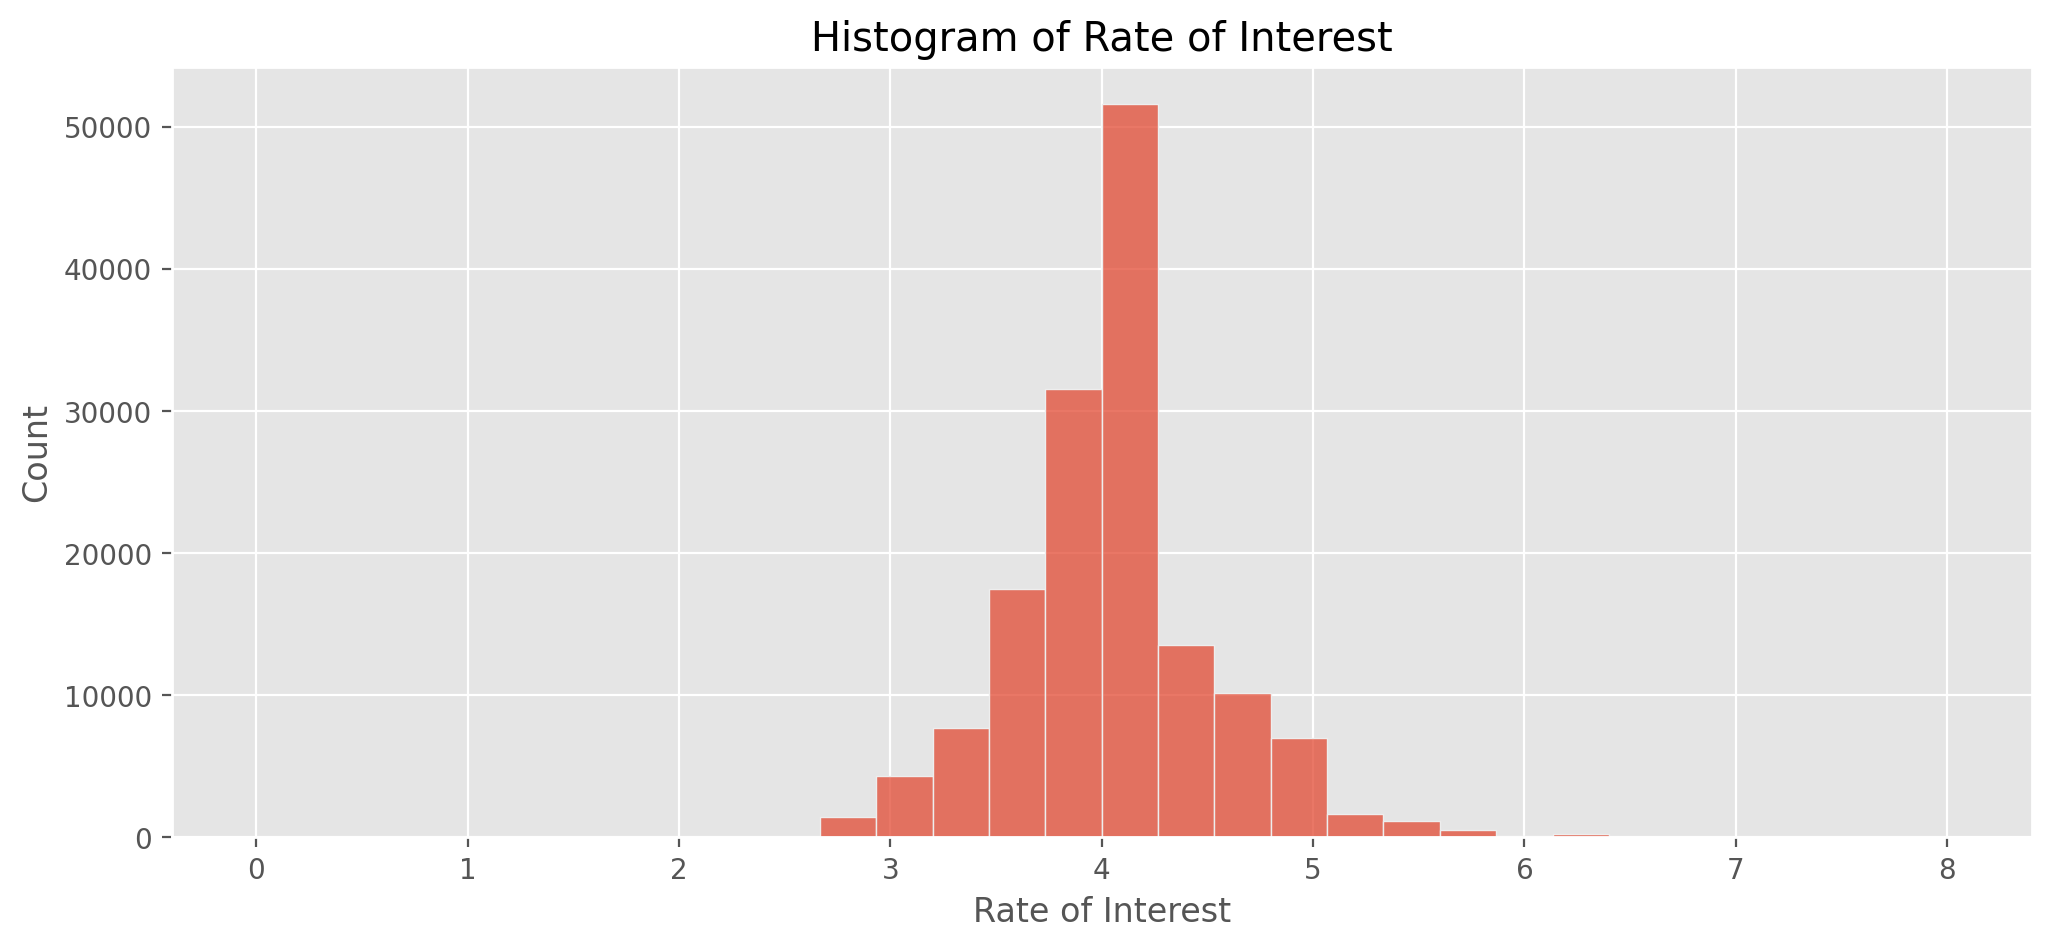

In [14]:
# histogram
plt.figure(figsize=(12, 5), dpi=200)
sns.histplot(data=data, x='rate_of_interest', bins=30)
plt.title("Histogram of Rate of Interest")
plt.xlabel("Rate of Interest")
plt.ylabel("Count")
plt.show()

In [15]:
data.columns

Index(['ID', 'year', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

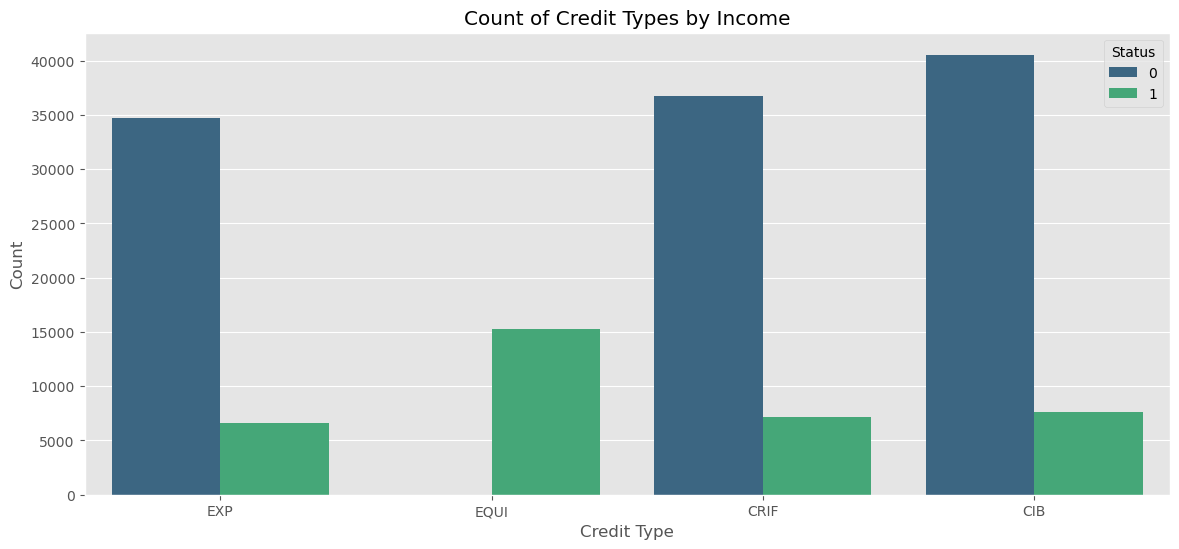

In [16]:
plt.figure(figsize=(14, 6))

# Categorical plot for 'credit_type' and 'income'
sns.countplot(x='credit_type', data=data, hue='Status', palette='viridis')
plt.title("Count of Credit Types by Income")
plt.xlabel("Credit Type")
plt.ylabel("Count")
plt.show()

In [17]:
data.columns

Index(['ID', 'year', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

Text(0, 0.5, 'Counts')

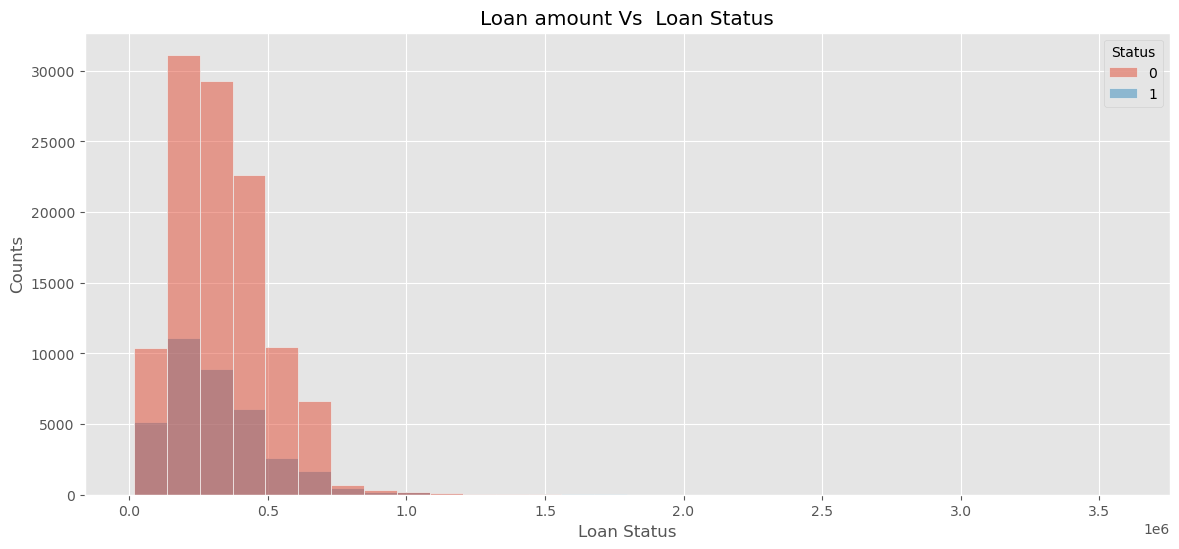

In [18]:
plt.figure(figsize=(14, 6))

# loanamount by Loan Status

sns.histplot(data=data, x='loan_amount', hue='Status', bins=30,  legend='top', kde=False)
plt.title("Loan amount Vs  Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

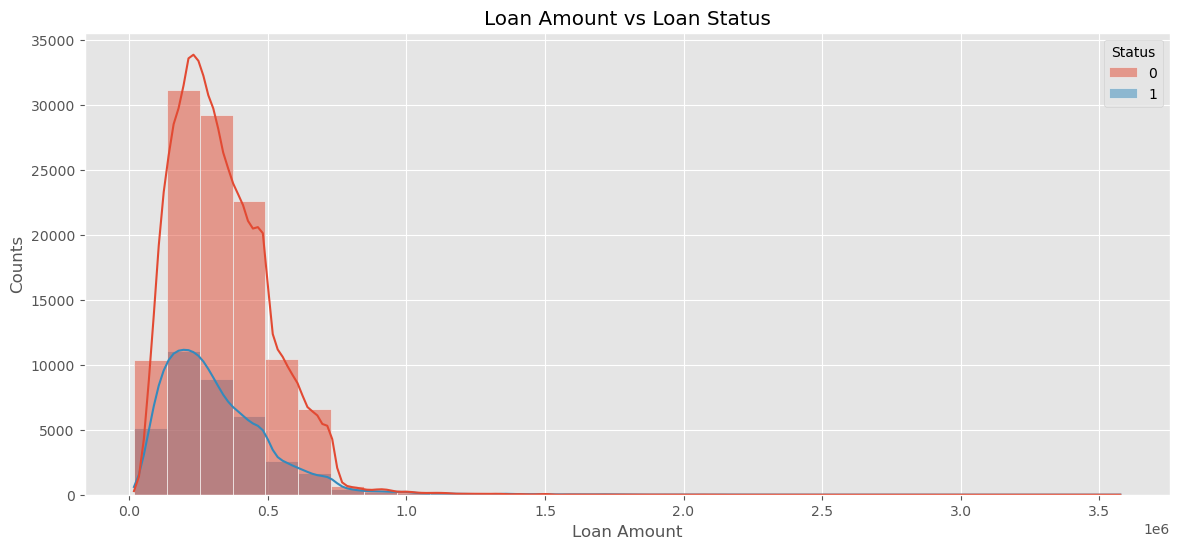

In [19]:
plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='loan_amount', hue='Status', bins=30, legend='top', kde=True)
plt.title("Loan Amount vs Loan Status")
plt.xlabel('Loan Amount')
plt.ylabel('Counts')

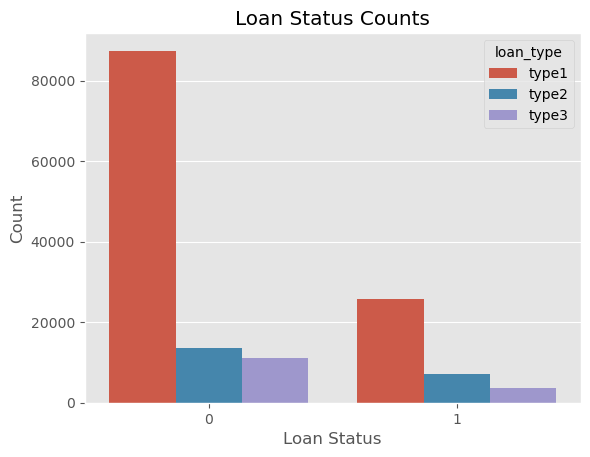

In [20]:
sns.countplot(x='Status', data=data, hue='loan_type')
plt.title("Loan Status Counts")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Credit_Score', ylabel='income'>

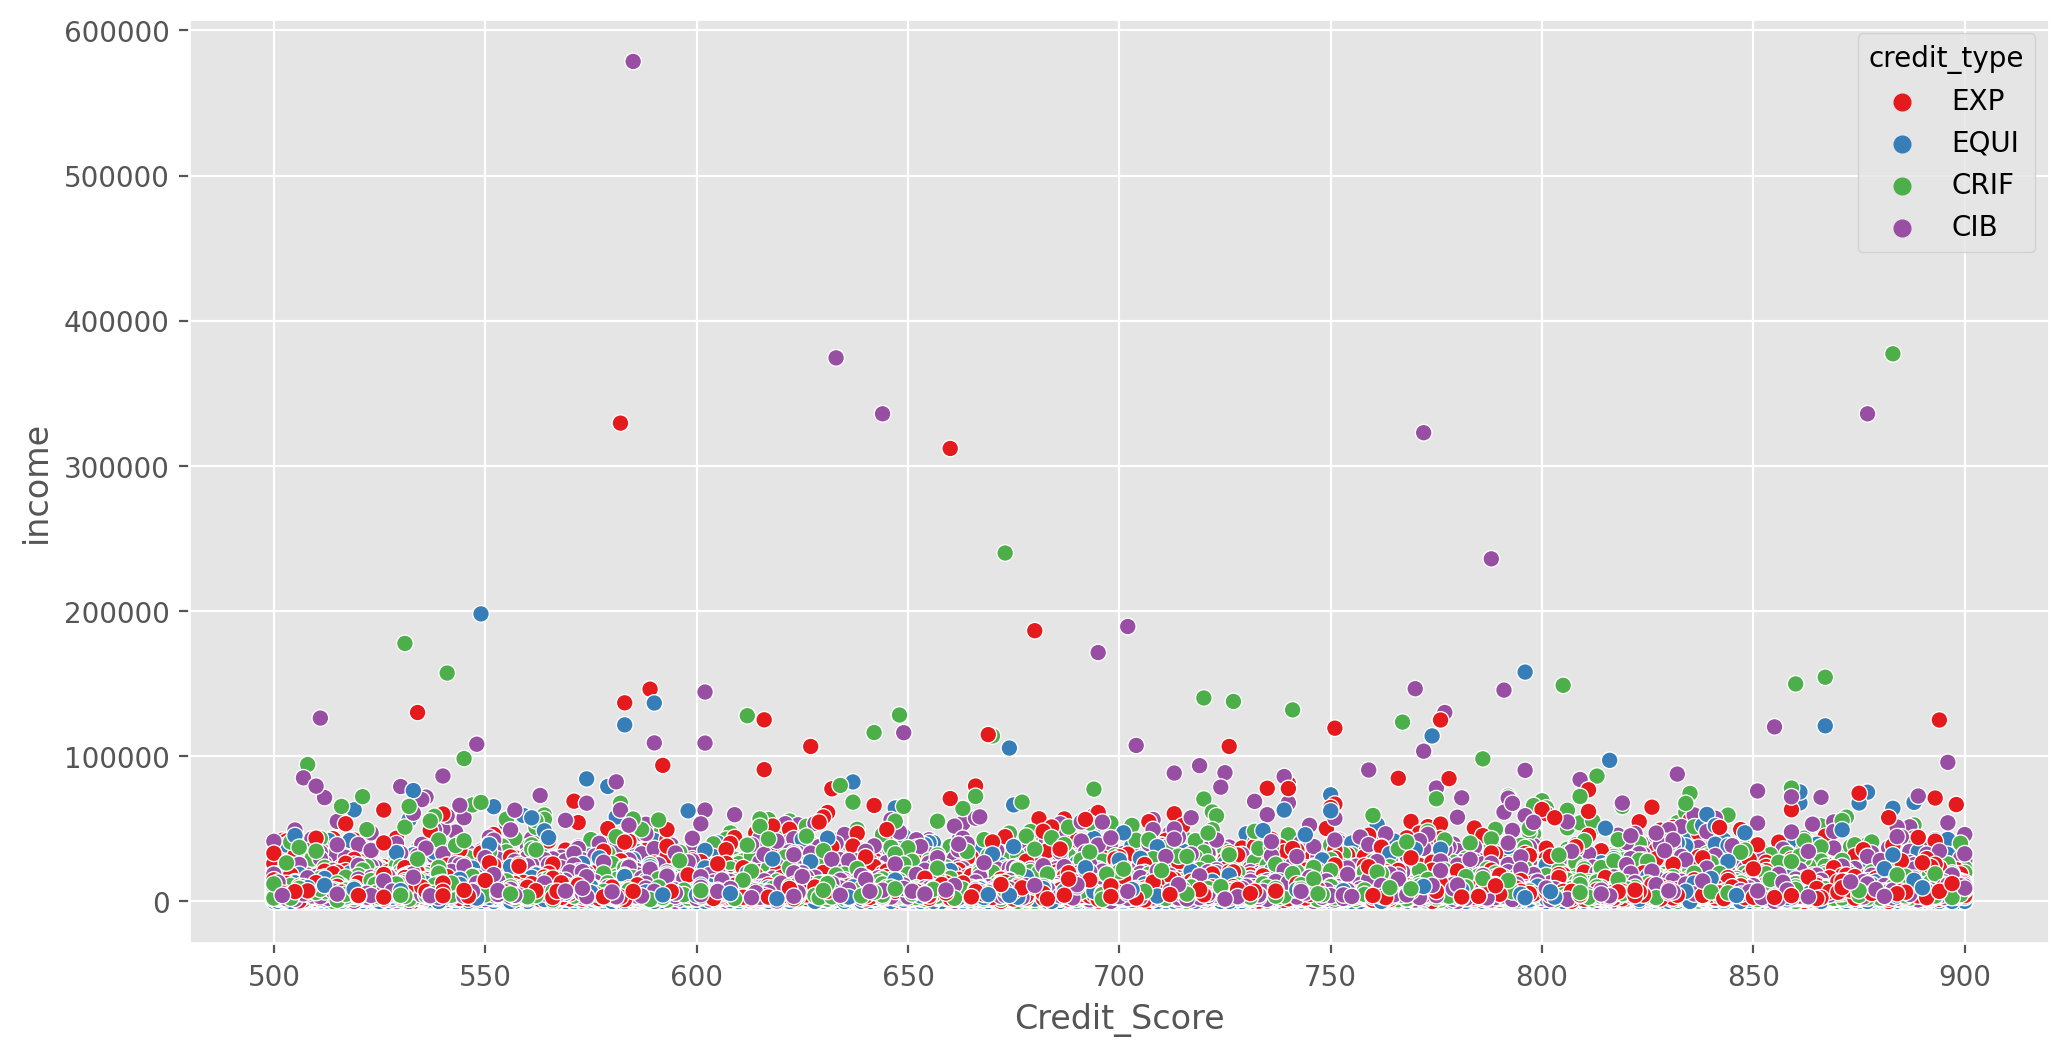

In [21]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(y=data['income'],x=data['Credit_Score'], data = data, hue=data['credit_type'], palette='Set1', alpha=1)

In [22]:

 data.corr().drop('year', axis=1).drop('year', axis=0)



,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,-0.000566,0.000384,2.030319e-03,-0.004717,-0.004055,0.000938,0.002456,-0.001036,-0.005545,1.703122e-03,-0.007441
loan_amount,-0.000566,1.000000,-0.124675,-3.114866e-01,0.053403,0.174450,0.687798,0.443258,0.004438,0.036410,-3.682528e-02,0.013634
rate_of_interest,0.000384,-0.124675,1.000000,6.143210e-01,-0.073862,0.183073,-0.107017,-0.029674,-0.001155,-0.000211,1.952158e-03,0.042404
Interest_rate_spread,0.002030,-0.311487,0.614321,1.000000e+00,0.032448,-0.137368,-0.291804,-0.112000,-0.001506,0.038529,-2.962990e-17,0.060313
Upfront_charges,-0.004717,0.053403,-0.073862,3.244849e-02,1.000000,-0.047253,0.044650,0.014524,-0.001269,-0.029832,-1.423662e-03,-0.001243
term,-0.004055,0.174450,0.183073,-1.373677e-01,-0.047253,1.000000,0.042761,-0.053317,-0.003149,0.101260,-2.397804e-04,0.103847
property_value,0.000938,0.687798,-0.107017,-2.918041e-01,0.044650,0.042761,1.000000,0.387084,0.002303,-0.215102,-3.952952e-02,-0.055501
income,0.002456,0.443258,-0.029674,-1.119996e-01,0.014524,-0.053317,0.387084,1.000000,0.000777,-0.028868,-6.369843e-02,-0.253248
Credit_Score,-0.001036,0.004438,-0.001155,-1.506292e-03,-0.001269,-0.003149,0.002303,0.000777,1.000000,-0.005244,4.003694e-03,-0.000286
LTV,-0.005545,0.036410,-0.000211,3.852892e-02,-0.029832,0.101260,-0.215102,-0.028868,-0.005244,1.000000,3.146519e-02,0.071577


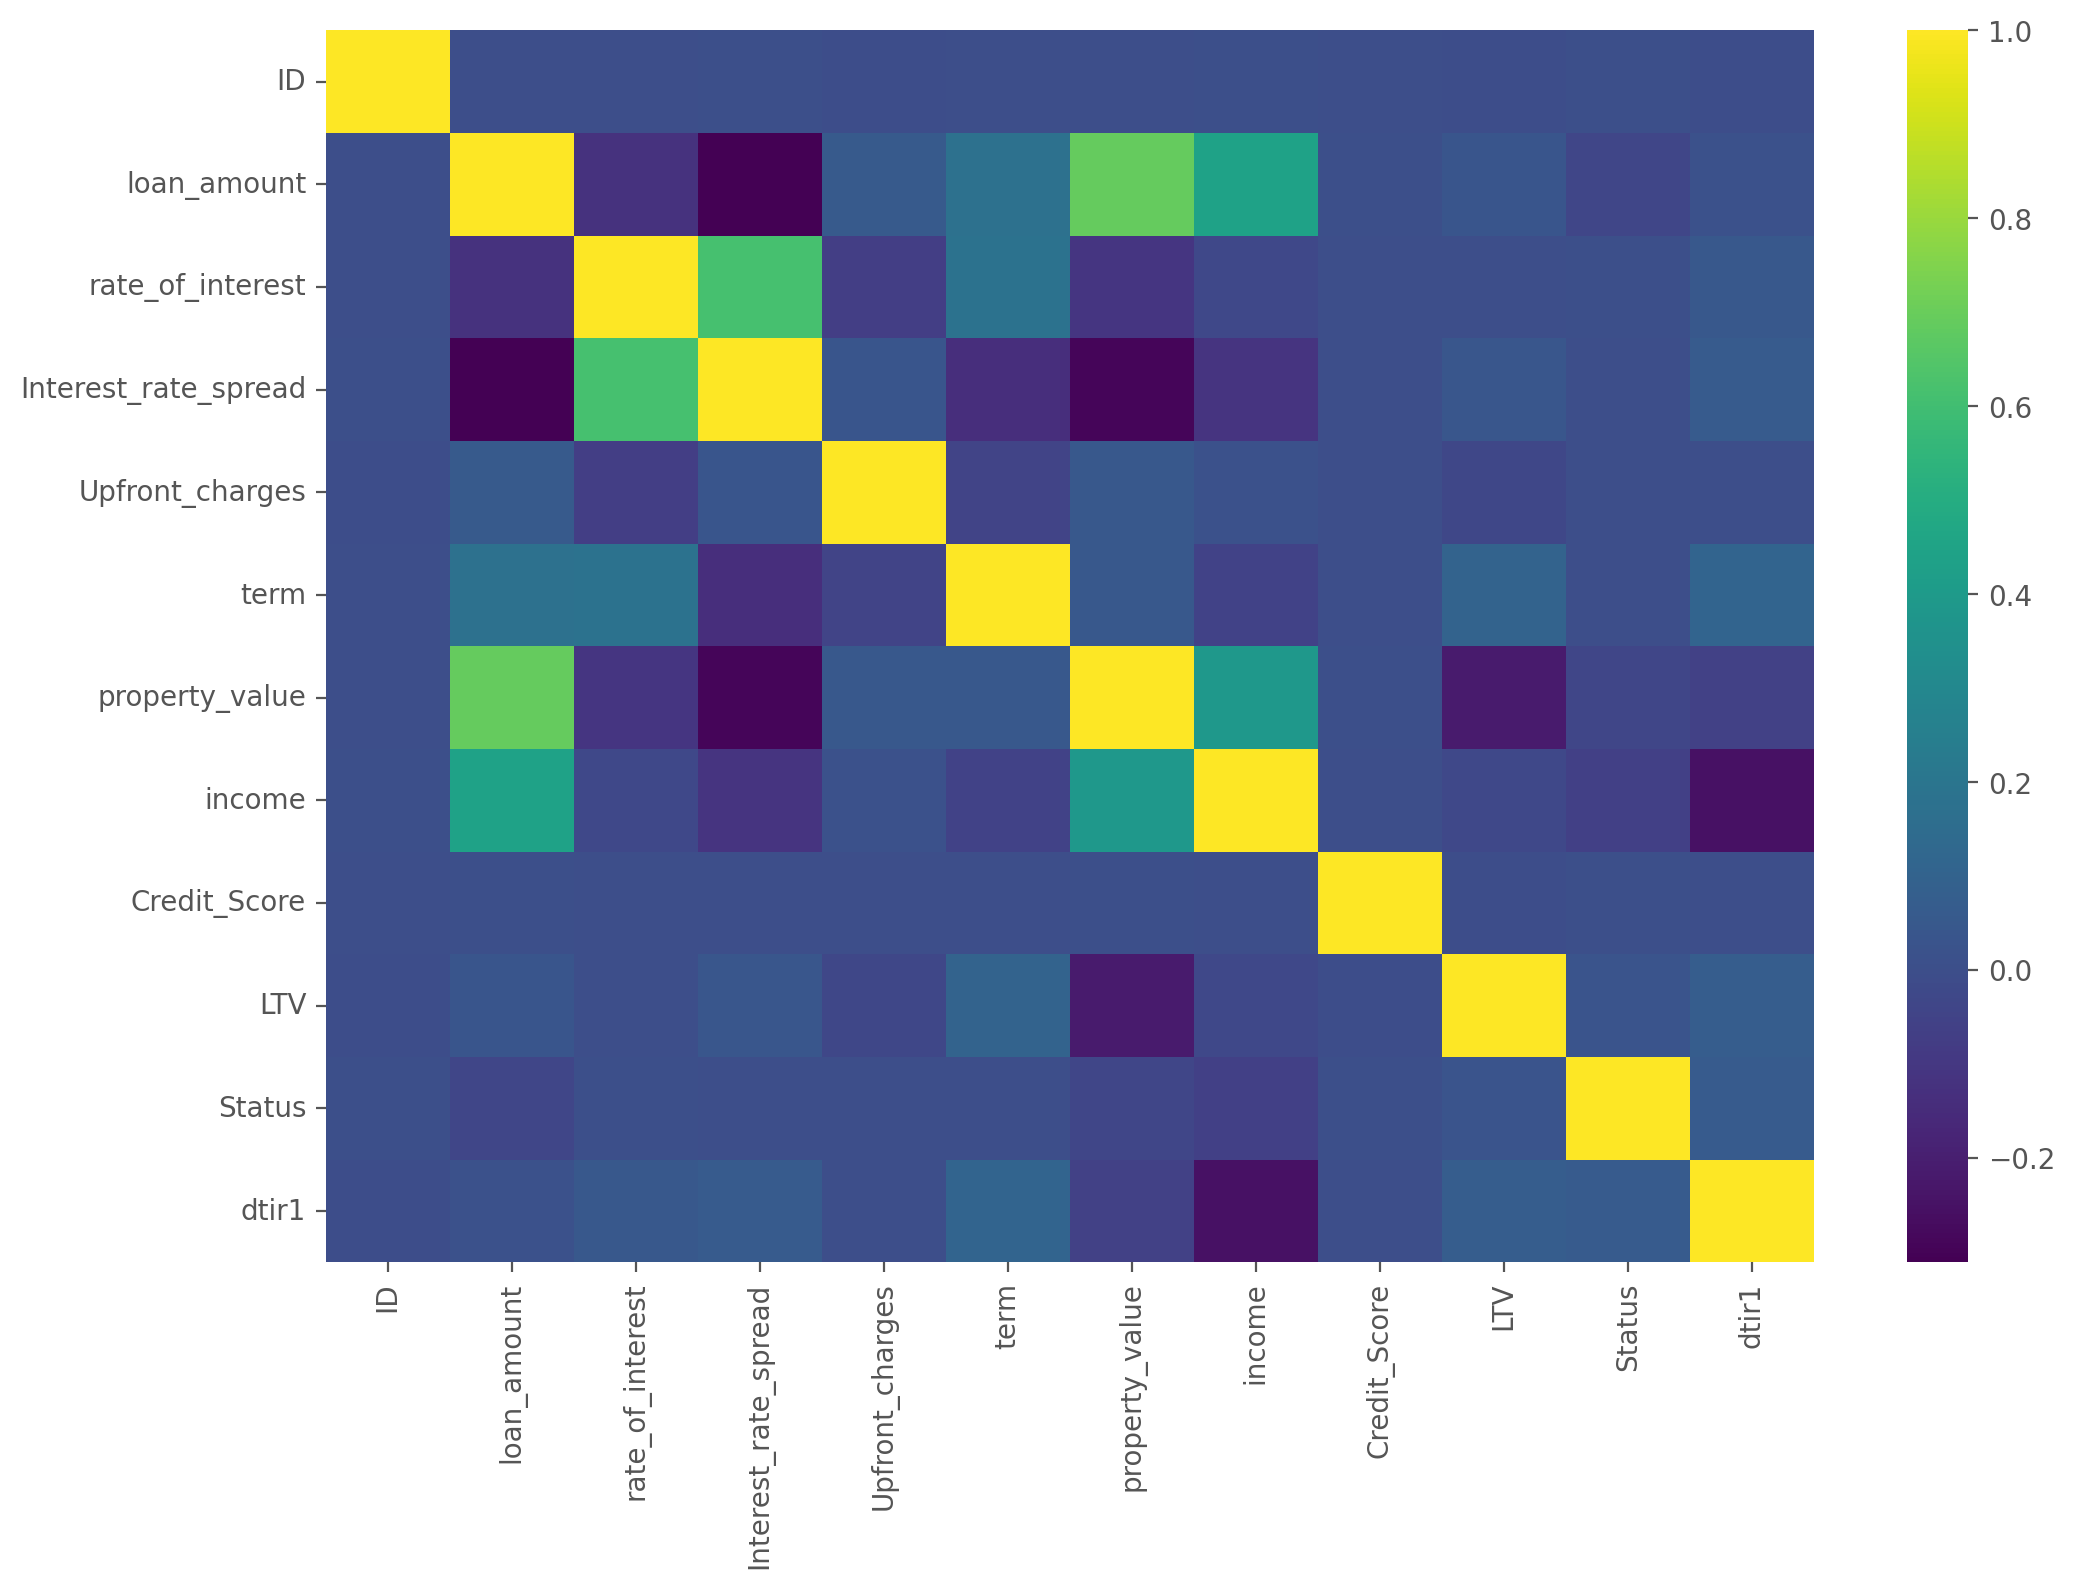

In [23]:
plt.figure(figsize=(12, 8), dpi=200)

correlation= data.corr().drop(['year'], axis=1).drop(['year'], axis=0)

sns.heatmap(correlation,  cmap='viridis')

# Show the plot
plt.show()


### Data preprocessing

### Scaling

In [24]:
cols = ['Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
        'dtir1']
X = data[cols]
Y = data[['Status']]

In [25]:
X.head()

,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,0.441656,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,45.000000
1,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,0.441656,...,4980.0,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,37.732932
2,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,46.000000
3,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,42.000000
4,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,39.000000


In [26]:
Y.head()

,Status
0,1
1,1
2,0
3,0
4,0


### Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Assuming 'data' is your DataFrame
columns_to_encode = ['Gender', 'loan_type', 'lump_sum_payment', 'loan_purpose', 'interest_only', 'Credit_Worthiness',
                      'business_or_commercial', 'occupancy_type', 'Secured_by', 'credit_type', 'open_credit', 'age',
                      'approv_in_adv', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type',
                      'Region', 'construction_type', 'Neg_ammortization', 'total_units']

for column in columns_to_encode:
    X[column] = label_encoder.fit_transform(data[column])

# Display the modified dataset
print(X.head())


   Gender  approv_in_adv  loan_type  loan_purpose  Credit_Worthiness  \
0       3              0          0             0                  0   
1       2              0          1             0                  0   
2       2              1          0             0                  0   
3       2              0          0             3                  0   
4       1              1          0             0                  0   

   open_credit  business_or_commercial  loan_amount  rate_of_interest  \
0            0                       1       116500          4.045476   
1            0                       0       206500          4.045476   
2            0                       1       406500          4.560000   
3            0                       1       456500          4.250000   
4            0                       1       696500          4.000000   

   Interest_rate_spread  ...   income  credit_type  Credit_Score  \
0              0.441656  ...   1740.0            3          

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
columns_to_scale = ['Gender', 'loan_type', 'lump_sum_payment', 'loan_purpose', 'interest_only', 'Credit_Worthiness',
                     'business_or_commercial', 'occupancy_type', 'Secured_by', 'credit_type', 'open_credit', 'age',
                     'approv_in_adv', 'co-applicant_credit_type', 'submission_of_application', 'Security_Type',
                     'Region', 'construction_type', 'Neg_ammortization', 'total_units']

scaler = MinMaxScaler()

# Fit and transform the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Display the modified dataset
print(X.head())


     Gender  approv_in_adv  loan_type  loan_purpose  Credit_Worthiness  \
0  1.000000            0.0        0.0           0.0                0.0   
1  0.666667            0.0        0.5           0.0                0.0   
2  0.666667            1.0        0.0           0.0                0.0   
3  0.666667            0.0        0.0           1.0                0.0   
4  0.333333            1.0        0.0           0.0                0.0   

   open_credit  business_or_commercial  loan_amount  rate_of_interest  \
0          0.0                     1.0       116500          4.045476   
1          0.0                     0.0       206500          4.045476   
2          0.0                     1.0       406500          4.560000   
3          0.0                     1.0       456500          4.250000   
4          0.0                     1.0       696500          4.000000   

   Interest_rate_spread  ...   income  credit_type  Credit_Score  \
0              0.441656  ...   1740.0     1.0000

In [29]:
X.head()

,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,116500,4.045476,0.441656,...,1740.0,1.000000,758,0.0,0.000000,1.0,98.728814,1.0,1.0,45.000000
1,0.666667,0.0,0.5,0.0,0.0,0.0,0.0,206500,4.045476,0.441656,...,4980.0,0.666667,552,1.0,0.500000,1.0,72.746457,0.0,1.0,37.732932
2,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,406500,4.560000,0.200000,...,9480.0,1.000000,834,0.0,0.166667,1.0,80.019685,1.0,1.0,46.000000
3,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,456500,4.250000,0.681000,...,11880.0,1.000000,587,0.0,0.333333,0.0,69.376900,0.0,1.0,42.000000
4,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,696500,4.000000,0.304200,...,10440.0,0.333333,602,1.0,0.000000,0.0,91.886544,0.0,1.0,39.000000


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20,
                                                    random_state = 101)

In [31]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (118936, 30)
Training Labels Shape :  (118936, 1)
Testing Data Shape    :  (29734, 30)
Testing Labels Shape  :  (29734, 1)


In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [33]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.7532202192775946
Testing Set Accuracy  :  0.7547924934418511


In [34]:
classifier.predict(x_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
def predict_survival(x):
    preds = classifier.predict(x)
    for pred in preds:
        if pred == 0:
            print('Loan default')
        else:
            print('No default')

In [36]:
y_test[:10]

,Status
126036,0
20619,0
55026,0
112968,0
65909,0
7539,0
36860,1
48662,0
99494,0
121289,0


In [37]:
predict_survival(x_test[:10])

Loan default
Loan default
Loan default
Loan default
Loan default
Loan default
Loan default
Loan default
Loan default
Loan default


In [38]:
# Training The Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [39]:
# Evaluate the model
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.8891588753615389
Testing Set Accuracy  :  0.8696105468487254


In [40]:
x_test[:5]

,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
126036,0.333333,0.0,0.0,0.666667,0.0,0.0,1.0,406500,4.000,-0.1776,...,7260.000000,0.000000,774,1.0,1.000000,0.0,62.731481,0.0,1.0,36.000000
20619,0.333333,0.0,0.0,0.666667,0.0,0.0,1.0,406500,4.625,0.5108,...,4860.000000,0.333333,822,1.0,0.166667,0.0,80.019685,0.0,1.0,41.000000
55026,0.000000,0.0,0.0,1.000000,0.0,0.0,1.0,116500,4.125,0.6316,...,1800.000000,1.000000,638,0.0,0.333333,1.0,61.968085,1.0,1.0,48.000000
112968,0.000000,0.0,1.0,0.666667,0.0,0.0,1.0,146500,4.500,0.2194,...,2100.000000,1.000000,783,0.0,0.666667,1.0,98.986486,0.0,1.0,43.000000
65909,1.000000,0.0,0.5,1.000000,0.0,0.0,0.0,206500,3.875,1.3742,...,6957.338876,1.000000,515,1.0,0.333333,1.0,74.280576,1.0,1.0,37.732932


In [41]:
classifier.predict(x_test[:5])

array([0, 0, 0, 0, 0], dtype=int64)

## ========================================================================

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [43]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9991339880271742
Testing Set Accuracy  :  0.9989237909463914


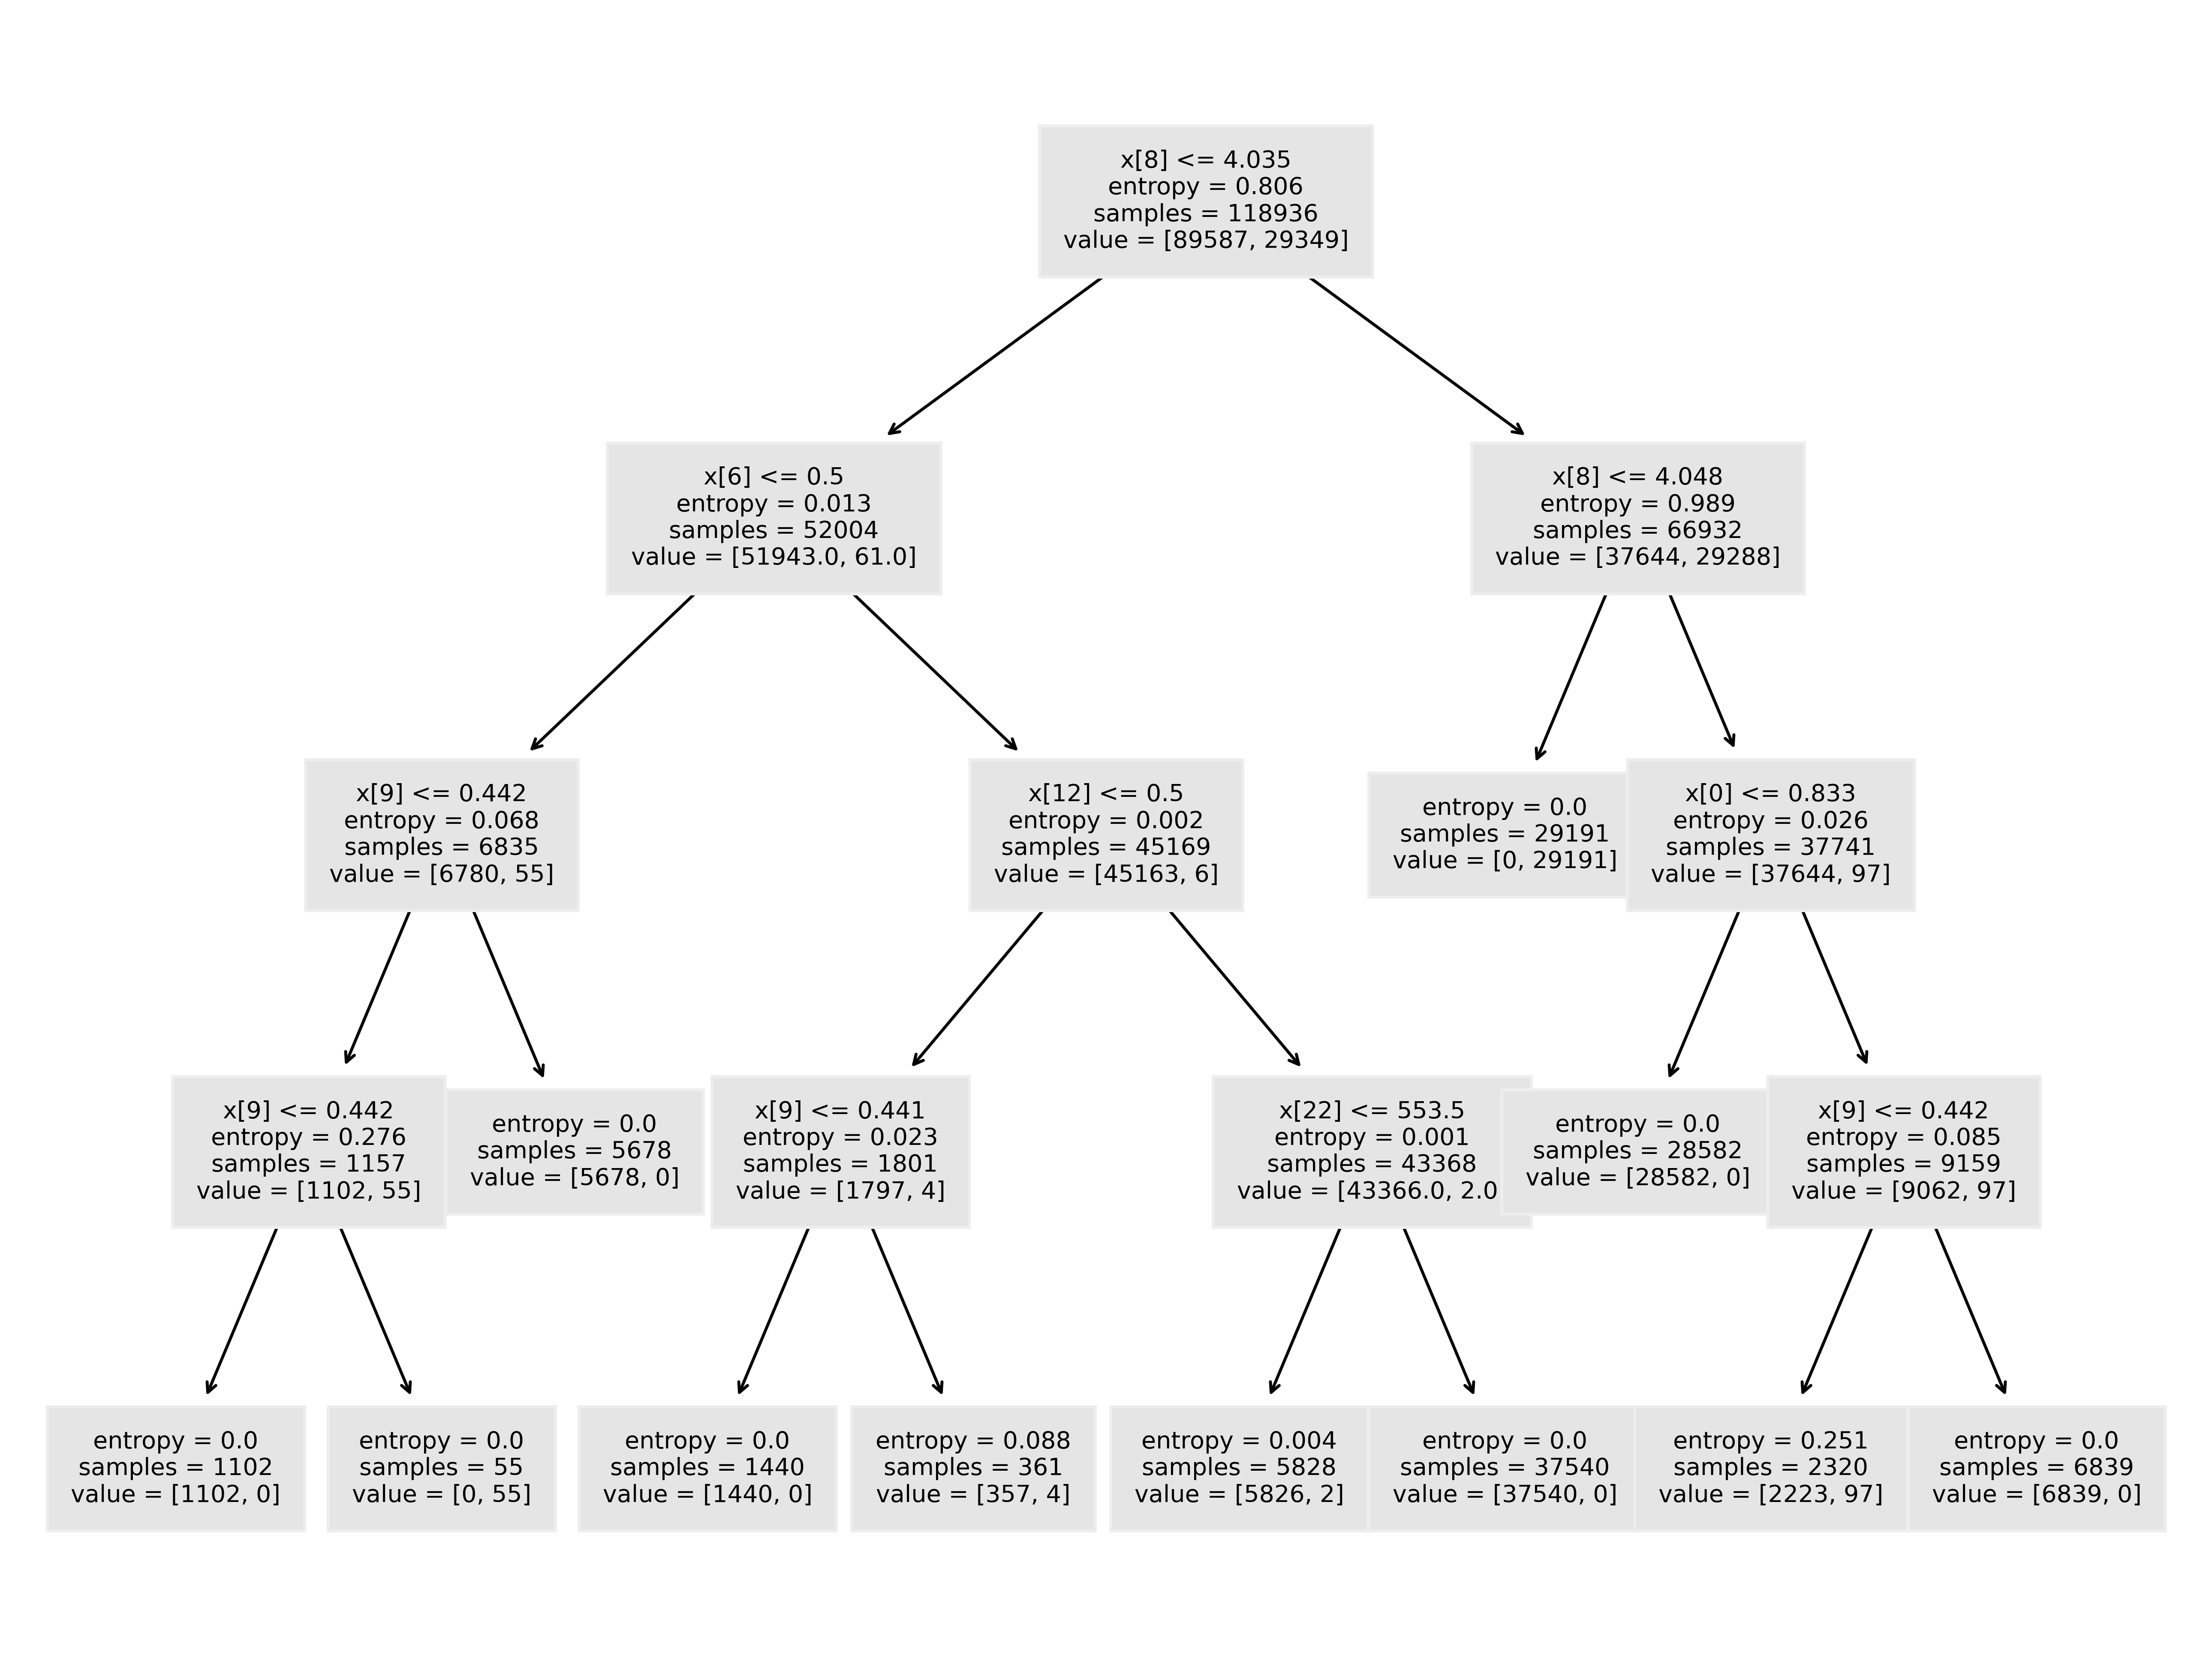

In [45]:
from sklearn.tree import plot_tree
plt.figure(dpi = 1000)
plot_tree(classifier, fontsize = 4)
plt.savefig('DecisionTree.png', dpi = 1000)
plt.show()

## ==========================================================================

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 4)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=50)

In [47]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9990835407277864
Testing Set Accuracy  :  0.9989910540122419


## ======================================================================

### STACKING

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)
dt_classifier  = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
rf_classifier  = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 4)

In [50]:
from sklearn.ensemble import VotingClassifier
classiffier = VotingClassifier([('knn', knn_classifier),
                                ('dt', dt_classifier),
                                ('rf', rf_classifier)], voting = 'hard')
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  1.0
Testing Set Accuracy  :  0.9999663684670748
